![Movie popcorn on red background](redpopcorn.jpg)

**Netflix**! What started in 1997 as a DVD rental service has since exploded into one of the largest entertainment and media companies.

Given the large number of movies and series available on the platform, it is a perfect opportunity to flex your exploratory data analysis skills and dive into the entertainment industry. Our friend has also been brushing up on their Python skills and has taken a first crack at a CSV file containing Netflix data. They believe that the average duration of movies has been declining. Using your friends initial research, you'll delve into the Netflix data to see if you can determine whether movie lengths are actually getting shorter and explain some of the contributing factors, if any.

You have been supplied with the dataset `netflix_data.csv` , along with the following table detailing the column names and descriptions. This data does contain null values and some outliers, but handling these is out of scope for the project. Feel free to experiment after submitting!

## The data
### **netflix_data.csv**
| Column | Description |
|--------|-------------|
| `show_id` | The ID of the show |
| `type` | Type of show |
| `title` | Title of the show |
| `director` | Director of the show |
| `cast` | Cast of the show |
| `country` | Country of origin |
| `date_added` | Date added to Netflix |
| `release_year` | Year of Netflix release |
| `duration` | Duration of the show in minutes |
| `description` | Description of the show |
| `genre` | Show genre |

In [55]:
# Importing pandas and matplotlib
import pandas as pd
import matplotlib.pyplot as plt

# Start coding!

In [56]:
# Load the csv file and store as netflix_df
netflix_df = pd.read_csv('netflix_data.csv')

# Check the data info
print(netflix_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   duration      7787 non-null   int64 
 9   description   7787 non-null   object
 10  genre         7787 non-null   object
dtypes: int64(2), object(9)
memory usage: 669.3+ KB
None


In [57]:
print(netflix_df.value_counts('type'))

type
Movie      5377
TV Show    2410
dtype: int64


In [58]:
# Filter the data to remove TV Shows and store as netflix_subset
netflix_subset = netflix_df[netflix_df['type'] != 'TV Show']

In [59]:
# Keep only the columns 'title', 'country', 'genre', 'release_year', 'duration' and save new data as netflix_movies
netflix_movies = netflix_subset.loc[:,['title', 'country', 'genre', 'release_year', 'duration']]

# Preview netflix_movies data
print(netflix_movies.head(5))

   title        country          genre  release_year  duration
1   7:19         Mexico         Dramas          2016        93
2  23:59      Singapore  Horror Movies          2011        78
3      9  United States         Action          2009        80
4     21  United States         Dramas          2008       123
6    122          Egypt  Horror Movies          2019        95


In [60]:
# Filter netflix_movies to find the movies that are stricly shorter than 60 minutes: short_movies
short_movies = netflix_movies[netflix_movies['duration'] < 60]

# Check which genres having a lot of 'less than 60 minutes' movies
print(short_movies.value_counts('genre'))

genre
Documentaries           151
Children                107
Stand-Up                 72
Uncategorized            40
Comedies                 15
Dramas                   12
Classic Movies            8
Action                    6
Anime Features            3
International Movies      3
Music                     2
Horror Movies             1
dtype: int64


In [61]:
# Have a peek of short_movies data
print(short_movies.head(5))

                                                 title  ... duration
35                                           #Rucker50  ...       56
55                 100 Things to do Before High School  ...       44
67   13TH: A Conversation with Oprah Winfrey & Ava ...  ...       37
101                                  3 Seconds Divorce  ...       53
146                                     A 3 Minute Hug  ...       28

[5 rows x 5 columns]


In [62]:
# Assign colors to genres
colors = []
for lab, row in netflix_movies.iterrows():
    if row['genre'] == 'Children':
        colors.append('red')
    elif row['genre'] == 'Documentaries':
        colors.append('blue')
    elif row['genre'] == 'Stand-Up':
        colors.append('green')
    else:
        colors.append('grey')
 

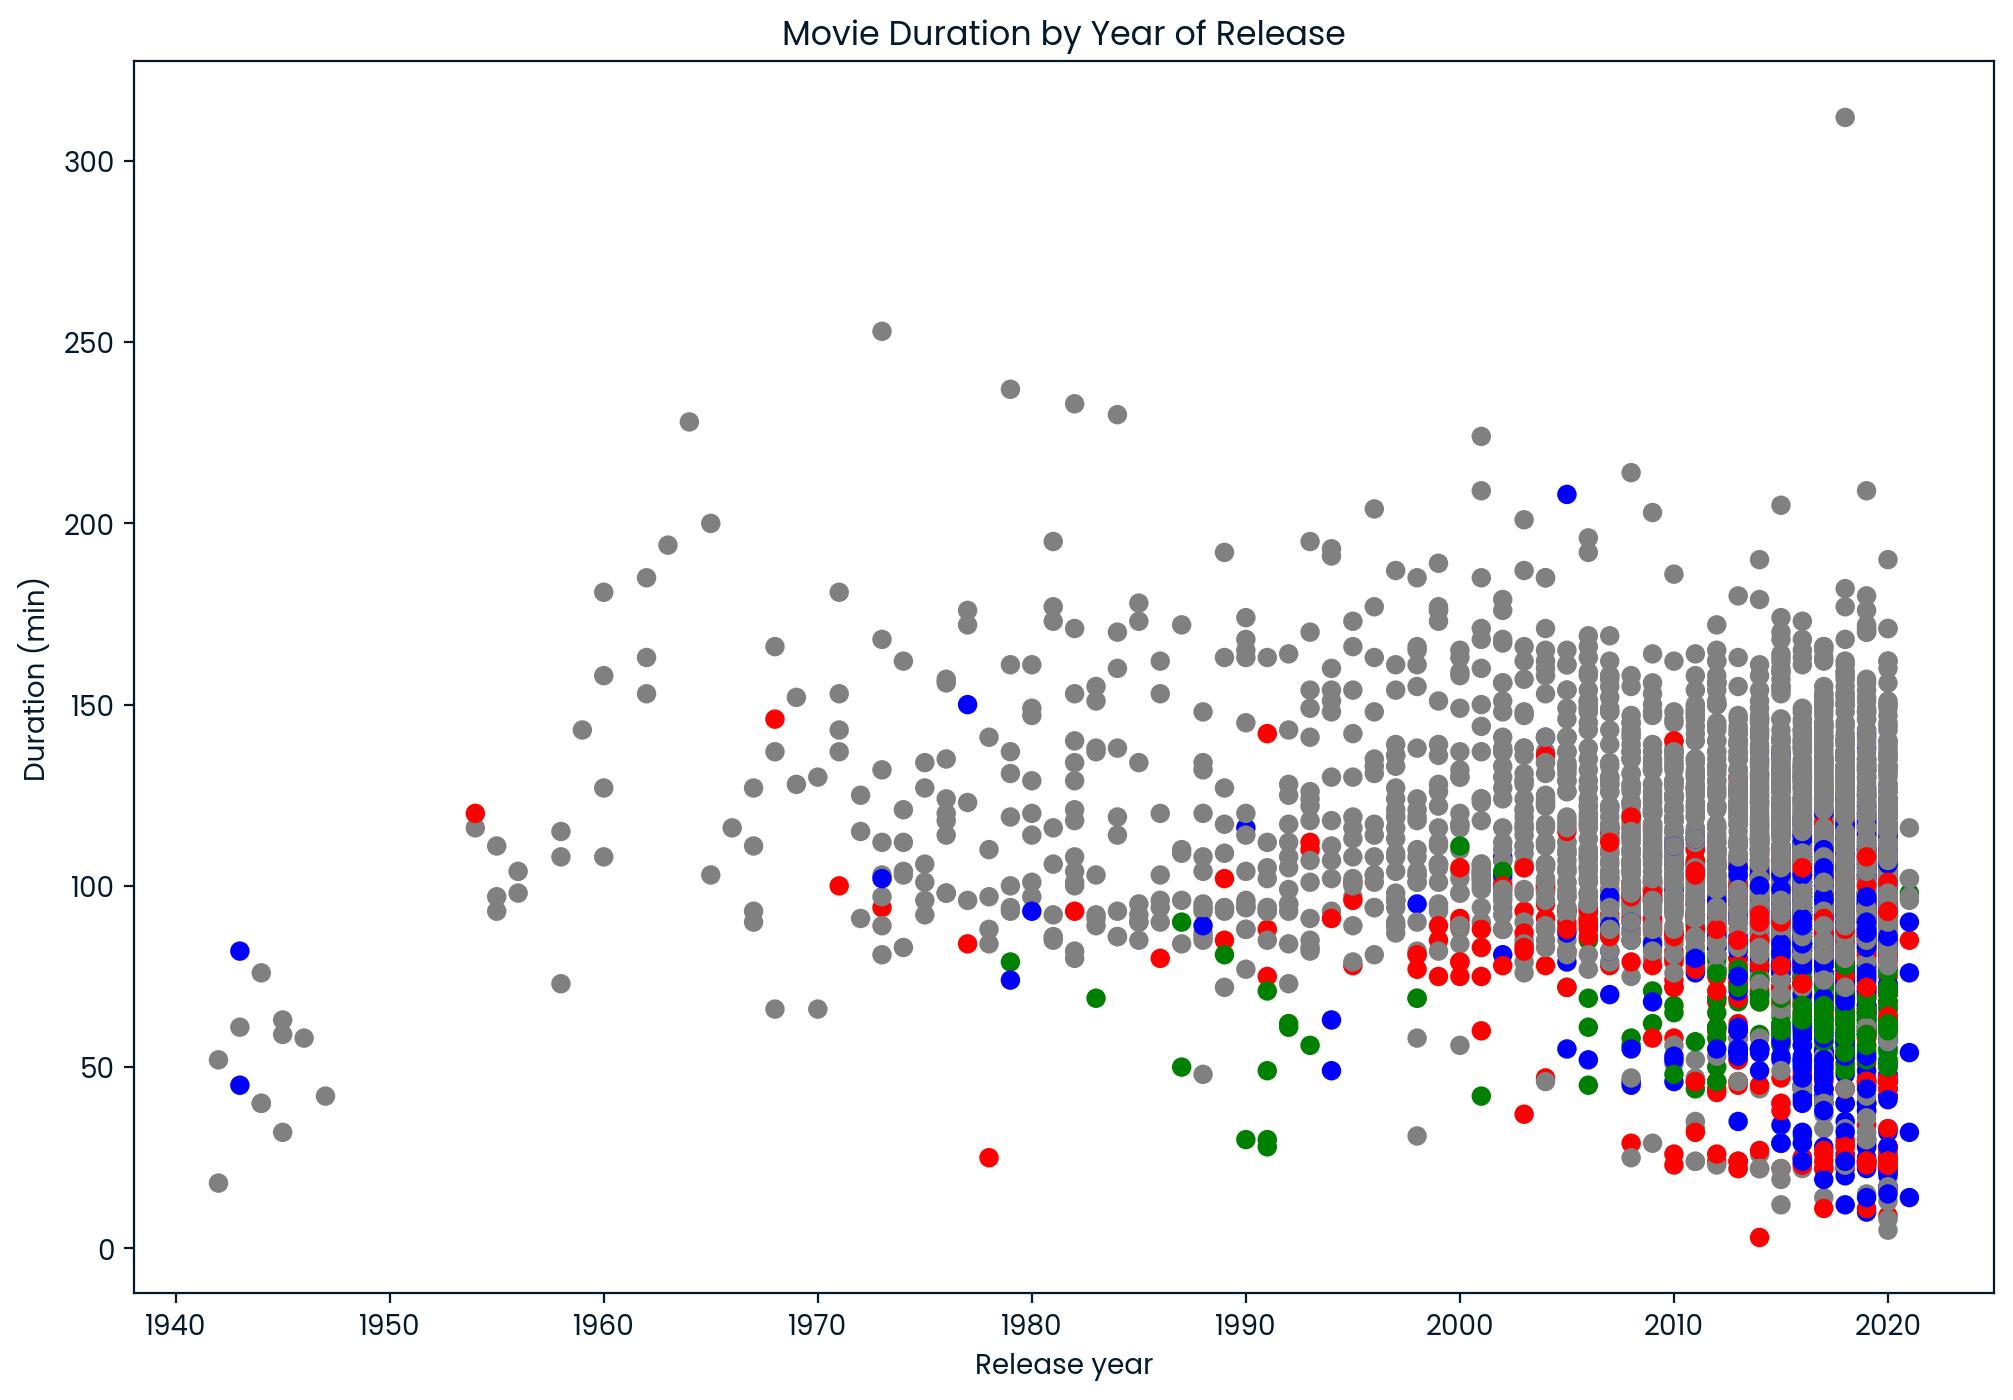

In [63]:
# Visualize with matplotlib

# Initialize a matplotlib figure object called fig:
fig = plt.figure(figsize=(12,8))

# Print out a scatter plot
plt.scatter(netflix_movies['release_year'], netflix_movies['duration'], c=colors)
plt.xlabel('Release year')
plt.ylabel('Duration (min)')
plt.title('Movie Duration by Year of Release')
plt.show()

After inspecting the plot, we are not certain that movies are getting shorter until we perform more analysis

In [64]:
answer = "no"